See leak explanation in [this post](https://www.kaggle.com/c/recursion-cellular-image-classification/discussion/102905).

RPE-03 and HUVEC-07 have the same pattern of controls, but not only… also the treatments are in the same pattern, only the plates are rotated.

Now, there is an experiment in the test set that has the same pattern of controls… HUVEC-18. See images below to demonstrate what I said.

Does HUVEC-18 also have the same pattern of treatments in some plate rotation?

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys

In [2]:
df_train = pd.read_csv("train.csv")
df_train_contr = pd.read_csv("train_controls.csv").drop(labels="well_type", axis=1)
df_test = pd.read_csv("test.csv")
df_test_contr = pd.read_csv("test_controls.csv").drop(labels="well_type", axis=1)

In [3]:
df_train.head(2)

id_code experiment  plate well  sirna
0  HEPG2-01_1_B03   HEPG2-01      1  B03    513
1  HEPG2-01_1_B04   HEPG2-01      1  B04    840

In [4]:
df_train_contr.head(2)

id_code experiment  plate well  sirna
0  HEPG2-01_1_B02   HEPG2-01      1  B02   1138
1  HEPG2-01_1_C03   HEPG2-01      1  C03   1109

In [5]:
# extract row and column number from well
df_train["row"] = df_train["well"].apply(lambda x: ord(x[0].lower()) - 96)
df_train["col"] = df_train["well"].apply(lambda x: int(x[1:]))
df_train_contr["row"] = df_train_contr["well"].apply(lambda x: ord(x[0].lower()) - 96)
df_train_contr["col"] = df_train_contr["well"].apply(lambda x: int(x[1:]))
df_test_contr["row"] = df_test_contr["well"].apply(lambda x: ord(x[0].lower()) - 96)
df_test_contr["col"] = df_test_contr["well"].apply(lambda x: int(x[1:]))
df_train.sample(n=5)

id_code experiment  plate well  sirna  row  col
2118   HEPG2-02_4_K12   HEPG2-02      4  K12    712   11   12
29860    RPE-04_4_O15     RPE-04      4  O15    575   15   15
13873  HUVEC-06_3_C14   HUVEC-06      3  C14    599    3   14
1700   HEPG2-02_3_D06   HEPG2-02      3  D06    926    4    6
11009  HUVEC-03_4_L19   HUVEC-03      4  L19    323   12   19

In [6]:
# create ordered list of treatment sirnas with group1+group2+...+group4
sirnas = []
exp = "HEPG2-03" # select experiment that has all sirnas
df_exp = df_train.groupby("experiment").get_group(exp)
for plate, df_exp_pl in df_exp.groupby("plate"):
    ss = sorted(df_exp_pl["sirna"].unique())
    sirnas += ss
    print("Plate {} has {} sirnas.".format(plate, df_exp_pl["sirna"].nunique()))
    print("   First 10 in ordered group:", ss[:10])

Plate 1 has 277 sirnas.
   First 10 in ordered group: [1, 3, 5, 6, 8, 10, 26, 33, 40, 46]
Plate 2 has 277 sirnas.
   First 10 in ordered group: [2, 7, 11, 19, 20, 22, 25, 27, 28, 41]
Plate 3 has 277 sirnas.
   First 10 in ordered group: [4, 21, 24, 29, 32, 34, 35, 38, 39, 49]
Plate 4 has 277 sirnas.
   First 10 in ordered group: [0, 9, 12, 13, 14, 15, 16, 17, 18, 23]


In [7]:
# write sirna groups to a dataframe to save as output
pd.DataFrame(data={"sirna" : sirnas, 
                   "group" : [i for i in range(1,5) for j in range(277)]}).to_csv("sirna_groups.csv", index=False)

In [8]:
# assign unique colors to treatment sirnas
sirnas_colormaps = {1 : "Blues", 2 : "Greens", 3 : "Purples", 4 : "Reds"}
colors = []
for plate in [1,2,3,4]:
    colors += [mpl.cm.get_cmap(sirnas_colormaps[plate])(i) for i in np.linspace(0., 1., 277)]
    
sirnas_colors_dict = dict(zip(sirnas, colors))
df_train["color"] = df_train["sirna"].map(sirnas_colors_dict)
df_train.head()

id_code experiment  plate well  sirna  row  col  \
0  HEPG2-01_1_B03   HEPG2-01      1  B03    513    2    3   
1  HEPG2-01_1_B04   HEPG2-01      1  B04    840    2    4   
2  HEPG2-01_1_B05   HEPG2-01      1  B05   1020    2    5   
3  HEPG2-01_1_B06   HEPG2-01      1  B06    254    2    6   
4  HEPG2-01_1_B07   HEPG2-01      1  B07    144    2    7   

                                               color  
0  (0.47294117647058825, 0.7116339869281045, 0.85...  
1  (0.11480199923106507, 0.42443675509419465, 0.6...  
2  (0.03137254901960784, 0.2734948096885813, 0.54...  
3  (0.8170703575547866, 0.8858900422914263, 0.950...  
4  (0.8825067281814687, 0.929196462898885, 0.9724...

In [9]:
# create ordered list of control sirnas
contr_sirnas = sorted(df_train_contr["sirna"].unique())
print(f"{len(contr_sirnas)} control sirnas.")

31 control sirnas.


In [10]:
# assign unique colors to control sirnas
colors = [mpl.cm.get_cmap("hsv")(i) for i in np.linspace(0., 1., 31)]
contr_sirnas_colors_dict = dict(zip(contr_sirnas, colors))
df_train_contr["color"] = df_train_contr["sirna"].map(contr_sirnas_colors_dict)
df_test_contr["color"] = df_test_contr["sirna"].map(contr_sirnas_colors_dict)
df_train_contr.head()

id_code experiment  plate well  sirna  row  col  \
0  HEPG2-01_1_B02   HEPG2-01      1  B02   1138    2    2   
1  HEPG2-01_1_C03   HEPG2-01      1  C03   1109    3    3   
2  HEPG2-01_1_C07   HEPG2-01      1  C07   1121    3    7   
3  HEPG2-01_1_C11   HEPG2-01      1  C11   1126    3   11   
4  HEPG2-01_1_C15   HEPG2-01      1  C15   1118    3   15   

                                               color  
0                           (1.0, 0.0, 0.09375, 1.0)  
1               (1.0, 0.18529430294136176, 0.0, 1.0)  
2                 (0.0, 1.0, 0.547793608090936, 1.0)  
3                (0.0, 0.4562523625023627, 1.0, 1.0)  
4  (0.03124934374934376, 1.0, 1.3125013124790507e...

Find frequency of group assignment patterns.

In [11]:
df_pattern = pd.DataFrame(index=df_train["experiment"].unique())
df_pattern["pattern"] = ""
for exp, df_exp in df_train.groupby("experiment"):
    pattern = ""
    for plate, df_exp_pl in df_exp.groupby("plate"):
        sirna_sample = df_exp_pl["sirna"].values[0]
        group_sirna_sample = sirnas.index(sirna_sample) // 277 + 1
        pattern += str(group_sirna_sample)
    df_pattern.loc[exp, "pattern"] = pattern

df_pattern.reset_index(inplace=True)
df_pattern.columns = ["experiment", "pattern"]
df_pattern

experiment pattern
0    HEPG2-01    1234
1    HEPG2-02    1234
2    HEPG2-03    1234
3    HEPG2-04    1234
4    HEPG2-05    3412
5    HEPG2-06    1234
6    HEPG2-07    1234
7    HUVEC-01    1234
8    HUVEC-02    1234
9    HUVEC-03    1234
10   HUVEC-04    1234
11   HUVEC-05    1234
12   HUVEC-06    1234
13   HUVEC-07    3412
14   HUVEC-08    1234
15   HUVEC-09    2341
16   HUVEC-10    2341
17   HUVEC-11    3412
18   HUVEC-12    1234
19   HUVEC-13    3412
20   HUVEC-14    3412
21   HUVEC-15    2341
22   HUVEC-16    1234
23     RPE-01    1234
24     RPE-02    1234
25     RPE-03    2341
26     RPE-04    1234
27     RPE-05    1234
28     RPE-06    3412
29     RPE-07    1234
30    U2OS-01    3412
31    U2OS-02    1234
32    U2OS-03    1234

In [12]:
df_pattern.groupby("pattern").size()

pattern
1234    22
2341     4
3412     7
dtype: int64

## Colorful visualization
Below the visualization. Experiments are grouped by their pattern.

Each group of 277 treatment siRNAs is visualized using the same nuances of a color (blue, green, purple, red).
Control siRNAs are always colored with the same nuance of the jet colormap.

### Can you find a pattern in the location of the controls??
Note: the hot red dot always close to the origin of the plot is the negative control (1138). Sometimes there's more than one negative per plate.

Pattern 1234



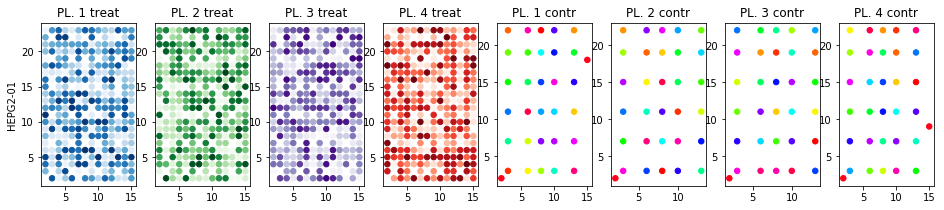

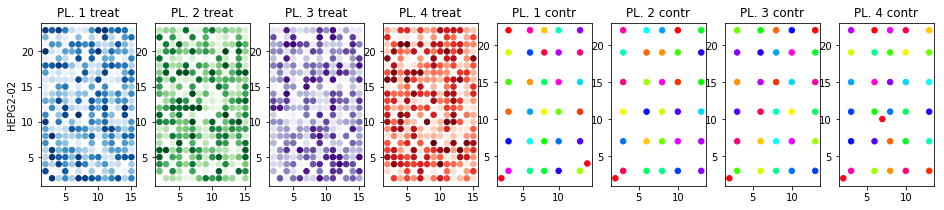

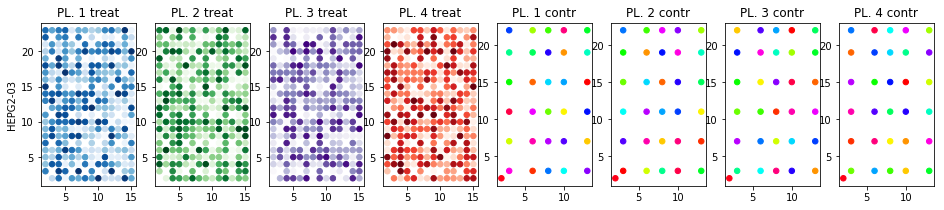

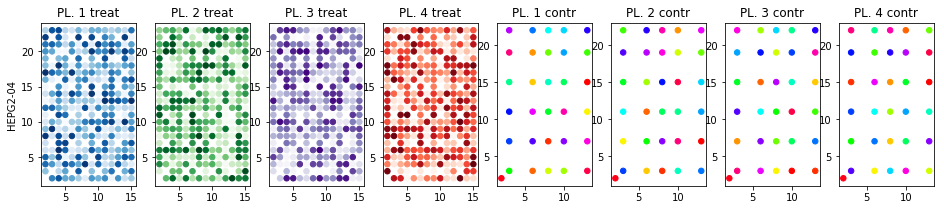

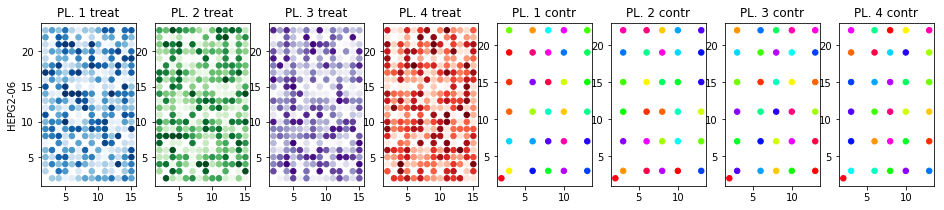

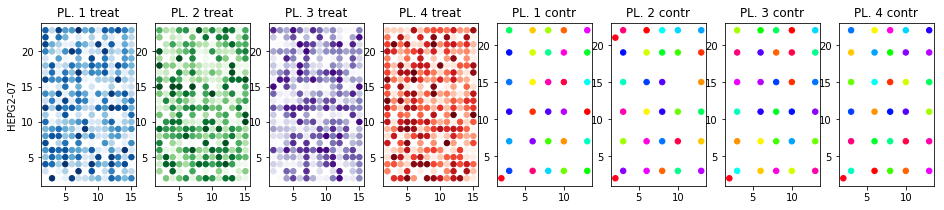

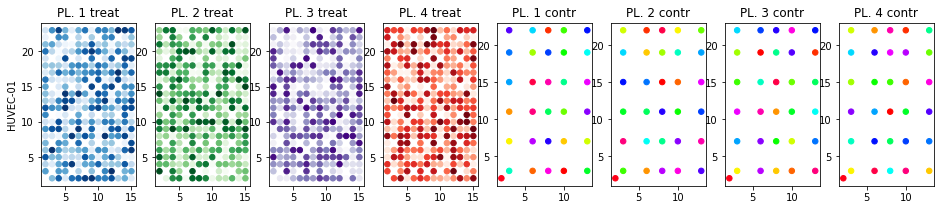

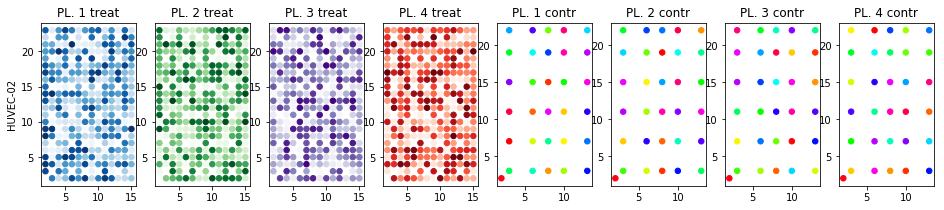

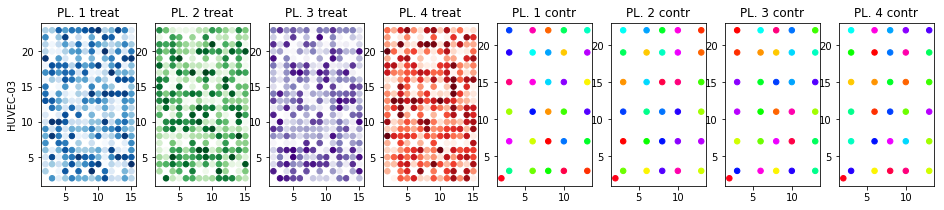

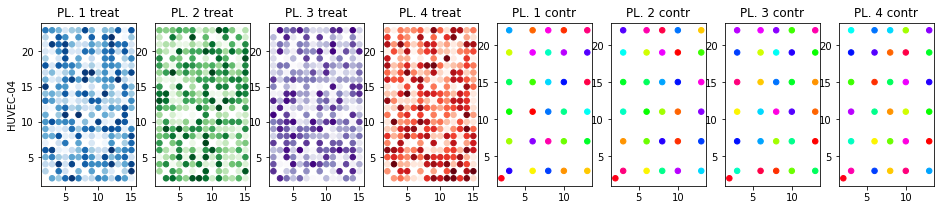

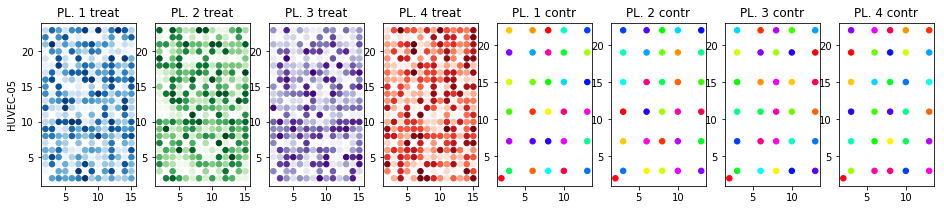

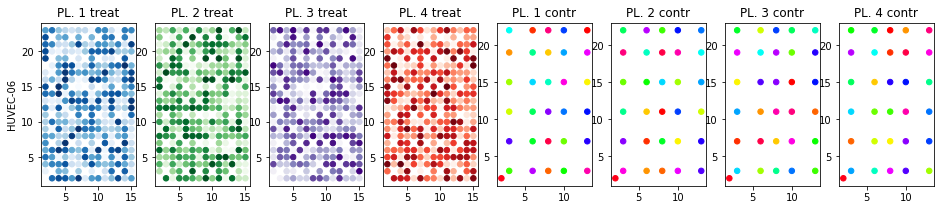

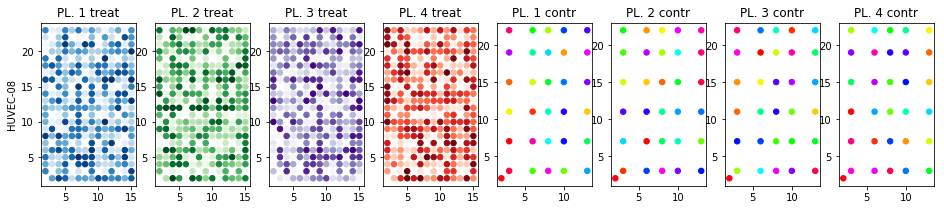

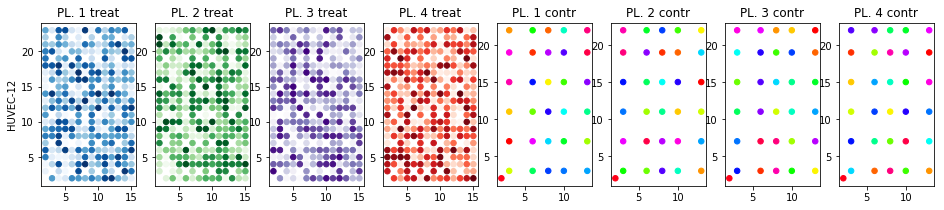

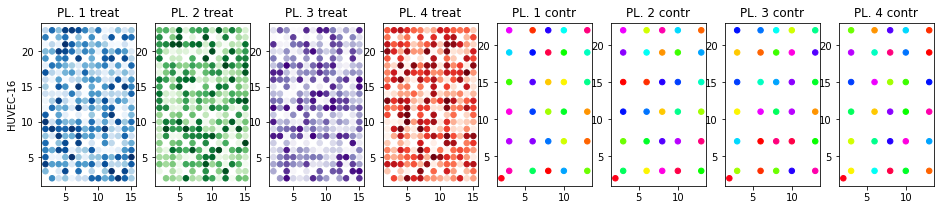

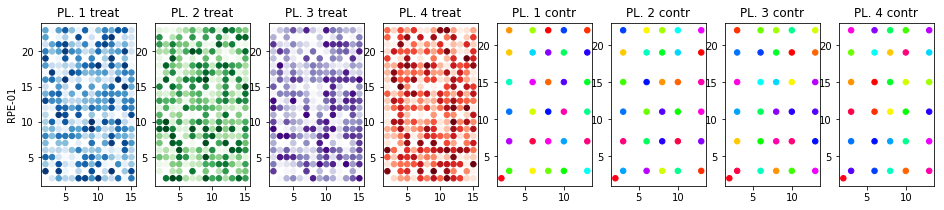

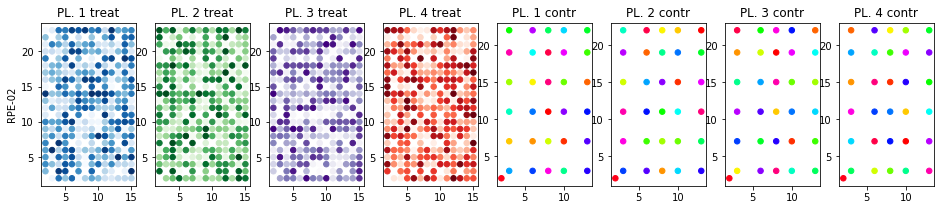

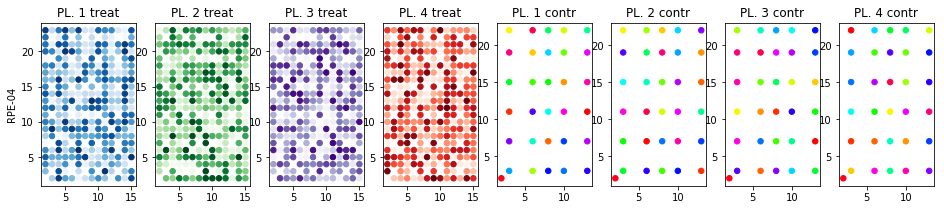

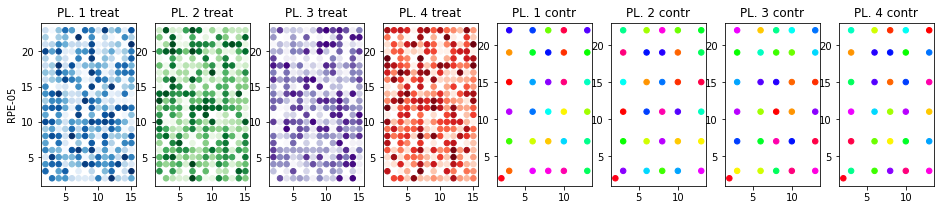

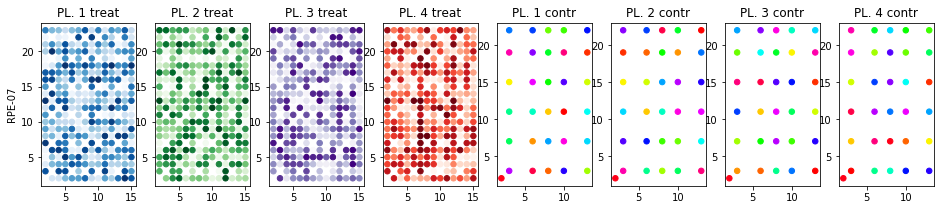

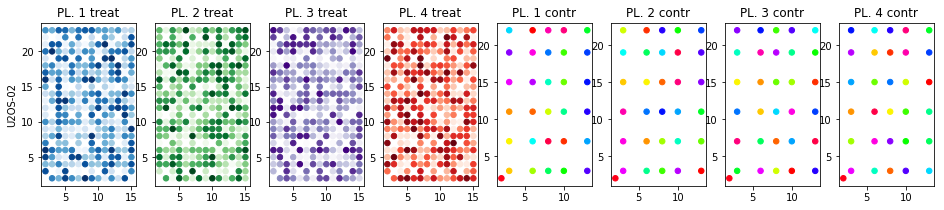

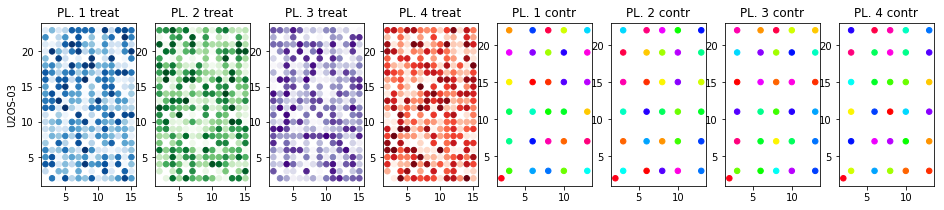

Pattern 2341



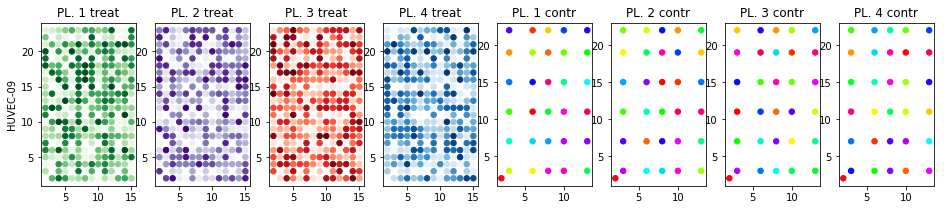

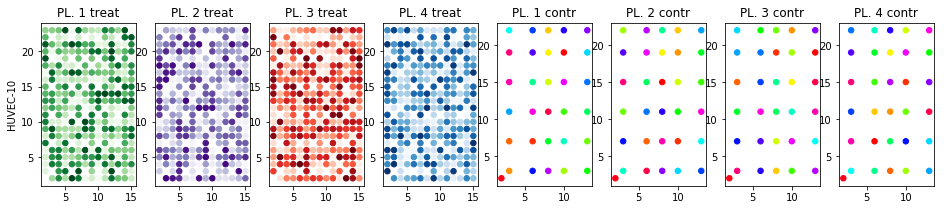

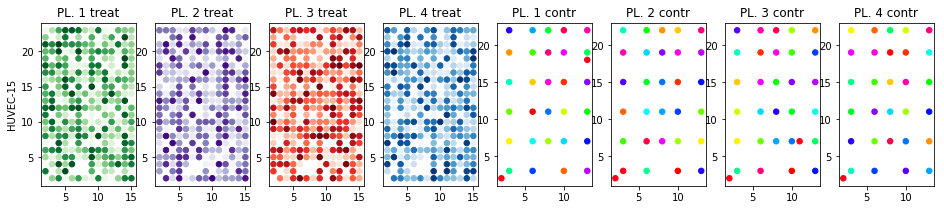

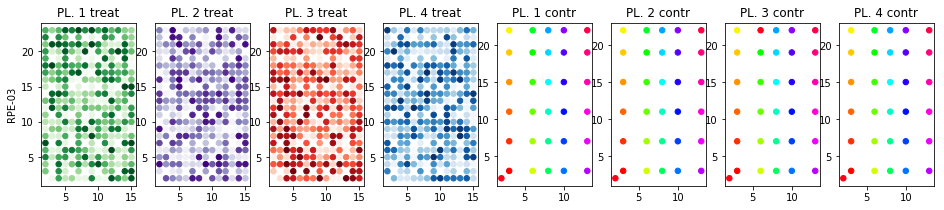

Pattern 3412



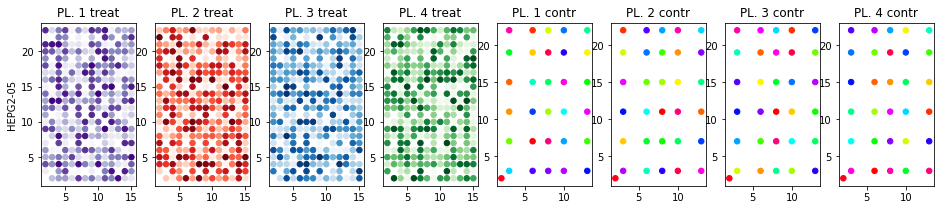

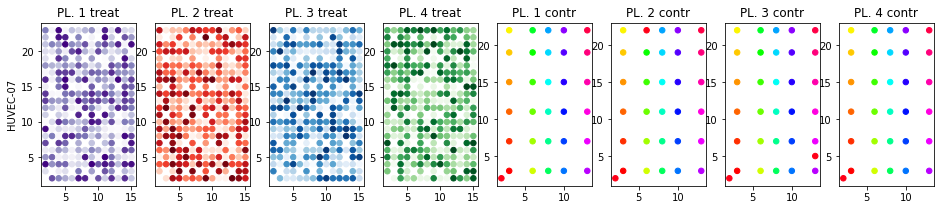

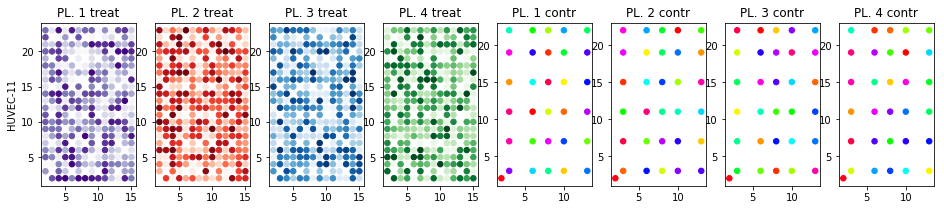

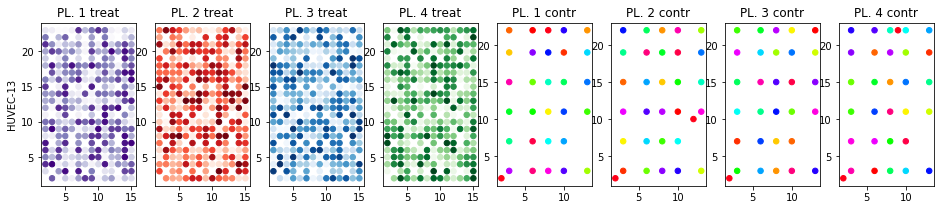

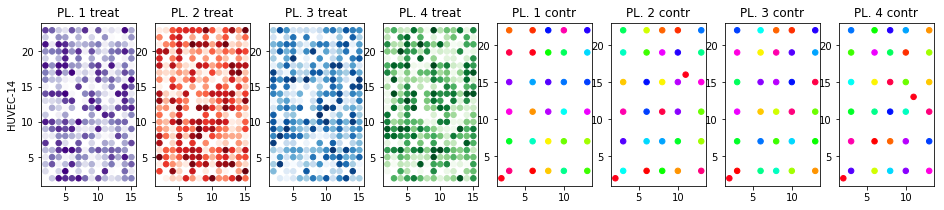

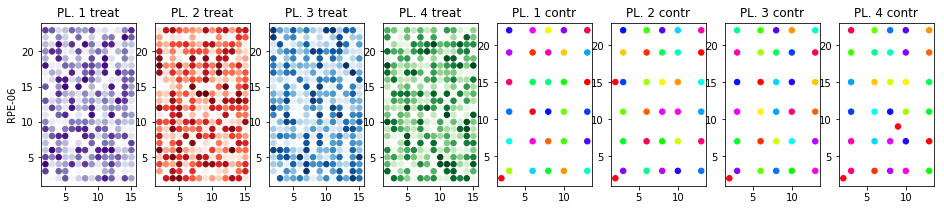

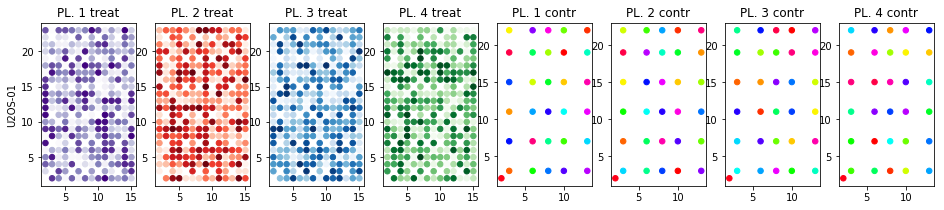

In [13]:
for pattern, df_pattern_pattern in df_pattern.groupby("pattern"):
    print("====================================================================")
    print(f"Pattern {pattern}\n")
    experiments = df_pattern_pattern["experiment"]
    for exp in experiments:
        df_exp = df_train.groupby("experiment").get_group(exp)
        fig, axs = plt.subplots(1, 8, figsize=(16,3))
        for plate, df_exp_pl in df_exp.groupby("plate"):
            if plate == 1:
                axs[plate-1].set_ylabel(exp)
            axs[plate-1].scatter(df_exp_pl["row"], df_exp_pl["col"], color=df_exp_pl["color"], s=30)
            axs[plate-1].set_title(f"PL. {plate} treat")
            df_exp_pl_contr = df_train_contr[(df_train_contr["experiment"]==exp) & (df_train_contr["plate"]==plate)]
            axs[plate-1+4].scatter(df_exp_pl_contr["row"], df_exp_pl_contr["col"], color=df_exp_pl_contr["color"], s=30)
            axs[plate-1+4].set_title(f"PL. {plate} contr")
        plt.show()

#### TEST

In [ ]:
import pdb

In [27]:
def get_plates():
    for pattern, df_pattern_pattern in df_pattern.groupby("pattern"):
        print("====================================================================")
        print(f"Pattern {pattern}\n")
        experiments = df_pattern_pattern["experiment"]
        for exp in experiments:
            df_exp = df_train.groupby("experiment").get_group(exp)
            fig, axs = plt.subplots(1, 8, figsize=(16,3))
            for plate, df_exp_pl in df_exp.groupby("plate"):
                if plate == 1:
                    axs[plate-1].set_ylabel(exp)
                #axs[plate-1].scatter(df_exp_pl["row"], df_exp_pl["col"], color=df_exp_pl["color"], s=30)
                return plate, df_exp_pl
                #axs[plate-1].set_title(f"PL. {plate} treat")
                #df_exp_pl_contr = df_train_contr[(df_train_contr["experiment"]==exp) & (df_train_contr["plate"]==plate)]
                #axs[plate-1+4].scatter(df_exp_pl_contr["row"], df_exp_pl_contr["col"], color=df_exp_pl_contr["color"], s=30)
                #axs[plate-1+4].set_title(f"PL. {plate} contr")
            plt.show()

Pattern 1234



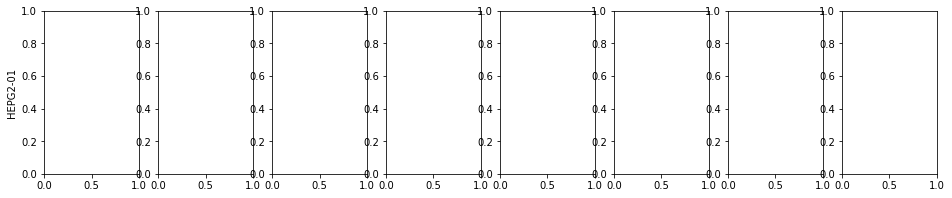

In [28]:
plate, df_exp_pl = get_plates()

In [29]:
plate

1

In [31]:
df_exp_pl.head()

id_code experiment  plate well  sirna  row  col  \
0  HEPG2-01_1_B03   HEPG2-01      1  B03    513    2    3   
1  HEPG2-01_1_B04   HEPG2-01      1  B04    840    2    4   
2  HEPG2-01_1_B05   HEPG2-01      1  B05   1020    2    5   
3  HEPG2-01_1_B06   HEPG2-01      1  B06    254    2    6   
4  HEPG2-01_1_B07   HEPG2-01      1  B07    144    2    7   

                                               color  
0  (0.47294117647058825, 0.7116339869281045, 0.85...  
1  (0.11480199923106507, 0.42443675509419465, 0.6...  
2  (0.03137254901960784, 0.2734948096885813, 0.54...  
3  (0.8170703575547866, 0.8858900422914263, 0.950...  
4  (0.8825067281814687, 0.929196462898885, 0.9724...

In [32]:
df_exp_pl["row"].head()

0    2
1    2
2    2
3    2
4    2
Name: row, dtype: int64

In [33]:
df_exp_pl["col"].head()

0    3
1    4
2    5
3    6
4    7
Name: col, dtype: int64

In [36]:
max(df_exp_pl["row"]), max(df_exp_pl["col"])

(15, 23)

In [38]:
test_array = np.zeros((max(df_exp_pl["row"]),max(df_exp_pl["col"])))

In [39]:
test_array.shape

(15, 23)

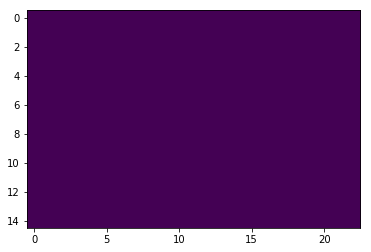

In [42]:
plt.imshow(test_array)

In [53]:
test_array = np.zeros((max(df_exp_pl["row"]),max(df_exp_pl["col"])))

In [56]:
test_array.shape

(15, 23)

In [57]:
for i, r in df_exp_pl.iterrows():
    #print(r)
    #print(r['row'])
    #print(r['col'])
    #print(r['sirna'])
    row = r['row']
    col = r['col']
    test_array[row-1,col-1] = r['sirna']

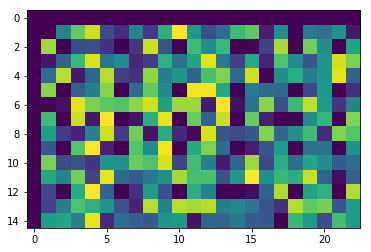

In [59]:
plt.imshow(test_array)

#### TEST END

Check if there's any pattern in the controls.

In [14]:
# controls seem to appear in a random order in the same "scheme" of wells
# sometimes negative controls appear in a well that is normally dedicated to a treatment (it's a failed treatment)
# pick "real" control wells from a plate that seems not to have failed treatments or anomalies
control_wells = df_train_contr.loc[(df_train_contr["experiment"]=="RPE-06") & (df_train_contr["plate"]==1), "well"].values
control_wells

array(['B02', 'C03', 'C07', 'C11', 'C15', 'C19', 'C22', 'F03', 'F07',
       'F11', 'F15', 'F19', 'F22', 'H03', 'H07', 'H11', 'H15', 'H19',
       'H22', 'J03', 'J07', 'J11', 'J15', 'J19', 'J22', 'M03', 'M07',
       'M11', 'M15', 'M19', 'M22'], dtype=object)

In [15]:
experiment_plate_contr_list = []
pattern_contr_list = []
for exp_pl, df_exp_pl in df_train_contr[df_train_contr["well"].isin(control_wells)].groupby(["experiment", "plate"]):
    experiment_plate_contr_list.append(exp_pl)
    # df_exp_pl is already sorted by row and column
    pattern_contr_list.append("_".join(df_exp_pl["sirna"].astype("str").values.tolist()))
df_pattern_contr = pd.DataFrame(data={"experiment_plate" : experiment_plate_contr_list,
                                      "pattern" : pattern_contr_list})
df_pattern_contr.head()

experiment_plate                                            pattern
0    (HEPG2-01, 1)  1138_1109_1121_1126_1118_1116_1110_1113_1114_1...
1    (HEPG2-01, 2)  1138_1134_1118_1126_1132_1115_1111_1127_1136_1...
2    (HEPG2-01, 3)  1138_1134_1129_1116_1114_1133_1126_1136_1124_1...
3    (HEPG2-01, 4)  1138_1125_1129_1117_1133_1115_1113_1116_1132_1...
4    (HEPG2-02, 1)  1138_1133_1128_1110_1117_1114_1108_1121_1123_1...

In [16]:
df_pattern_contr.groupby("pattern").size().sort_values(ascending=False).head(5)

pattern
1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_1119_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137    6
1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_1138_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137    2
1138_1119_1118_1134_1123_1130_1113_1129_1108_1137_1122_1120_1115_1117_1126_1114_1116_1136_1112_1128_1135_1133_1132_1125_1124_1109_1127_1121_1110_1111_1131    1
1138_1116_1109_1135_1132_1110_1126_1125_1136_1130_1118_1127_1137_1117_1113_1120_1128_1124_1123_1112_1111_1129_1108_1121_1133_1119_1134_1122_1114_1131_1115    1
1138_1116_1136_1130_1108_1124_1135_1118_1119_1121_1133_1131_1111_1123_1113_1117_1110_1115_1137_1132_1120_1129_1134_1128_1114_1127_1126_1125_1109_1122_1112    1
dtype: int64

The first two patterns are in fact almost the same (note that 1119 in the first pattern becomes a negative 1138 in the second pattern).
1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_**1119**_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137
1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_**1138**_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137

I inspected the remaining patterns by eye but couldn't find any hint of a scheme or something.

Below the experiments and plates with the same control pattern. All plates of HUVEC-07 and RPE-03 have the same "scheme" of control siRNAs.

In [17]:
p1 = "1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_1119_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137"
p2 = "1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_1138_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137"
df_pattern_contr[df_pattern_contr["pattern"].isin([p1,p2])]

experiment_plate                                            pattern
52     (HUVEC-07, 1)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
53     (HUVEC-07, 2)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
54     (HUVEC-07, 3)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
55     (HUVEC-07, 4)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
100      (RPE-03, 1)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
101      (RPE-03, 2)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
102      (RPE-03, 3)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
103      (RPE-03, 4)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...

### What happens in the test set?

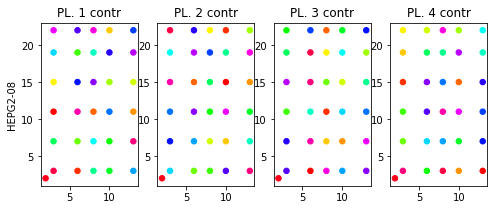

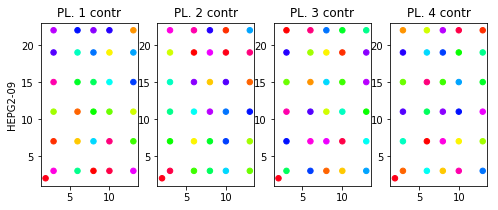

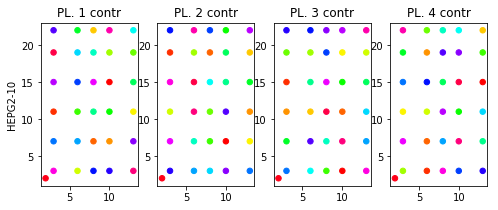

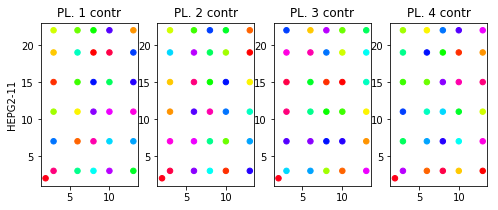

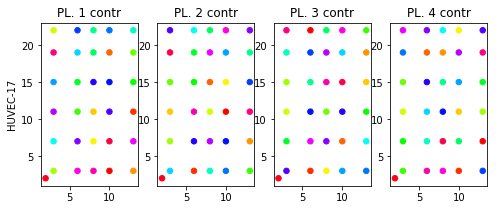

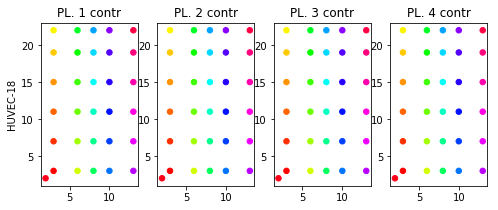

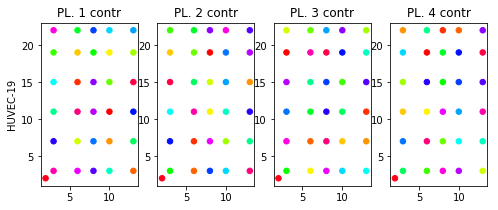

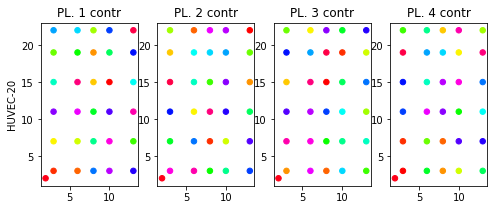

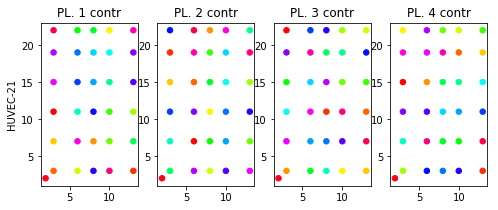

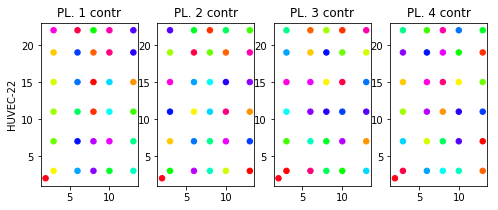

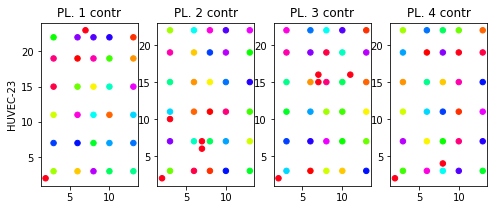

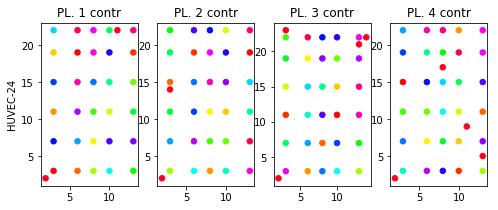

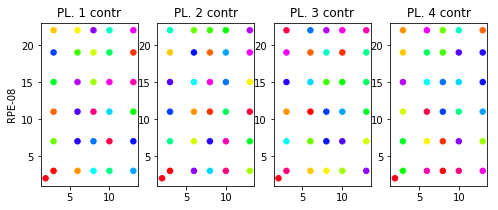

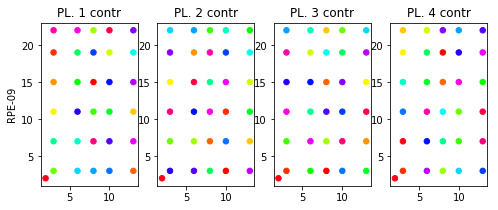

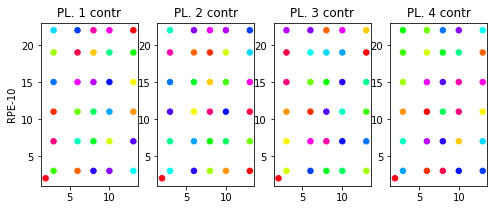

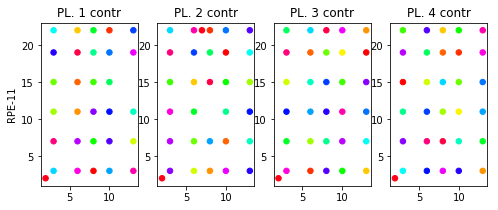

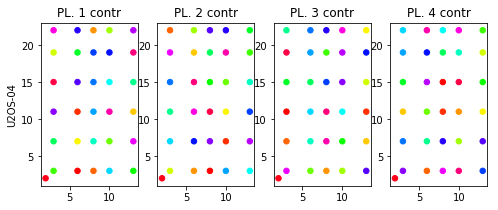

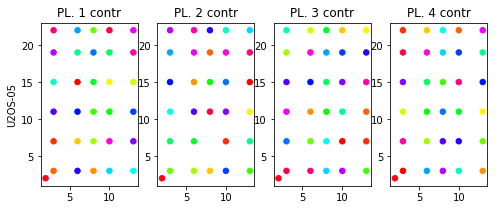

In [18]:
# visualize controls in test
for exp, df_exp in df_test_contr.groupby("experiment"):
    fig, axs = plt.subplots(1, 4, figsize=(8,3))
    for plate, df_exp_pl in df_exp.groupby("plate"):
        if plate == 1:
            axs[plate-1].set_ylabel(exp)
        axs[plate-1].scatter(df_exp_pl["row"], df_exp_pl["col"], color=df_exp_pl["color"], s=30)
        axs[plate-1].set_title(f"PL. {plate} contr")
    plt.show()

In [19]:
experiment_plate_contr_test_list = []
pattern_contr_test_list = []
for exp_pl, df_exp_pl in df_test_contr[df_test_contr["well"].isin(control_wells)].groupby(["experiment", "plate"]):
    experiment_plate_contr_test_list.append(exp_pl)
    # df_exp_pl is already sorted by row and column
    pattern_contr_test_list.append("_".join(df_exp_pl["sirna"].astype("str").values.tolist()))
df_pattern_contr_test = pd.DataFrame(data={"experiment_plate" : experiment_plate_contr_test_list,
                                           "pattern" : pattern_contr_test_list})
df_pattern_contr_test.head()

experiment_plate                                            pattern
0    (HEPG2-08, 1)  1138_1137_1120_1108_1113_1124_1133_1109_1116_1...
1    (HEPG2-08, 2)  1138_1124_1128_1126_1135_1123_1137_1116_1125_1...
2    (HEPG2-08, 3)  1138_1130_1129_1117_1132_1120_1118_1108_1135_1...
3    (HEPG2-08, 4)  1138_1136_1116_1117_1109_1112_1113_1118_1124_1...
4    (HEPG2-09, 1)  1138_1134_1109_1115_1135_1130_1132_1121_1112_1...

In [20]:
df_pattern_contr_test.groupby("pattern").size().sort_values(ascending=False).head(5)

pattern
1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_1119_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137    4
1138_1116_1131_1124_1121_1135_1115_1137_1122_1110_1111_1112_1123_1109_1120_1108_1113_1127_1134_1128_1125_1136_1126_1132_1130_1119_1114_1117_1129_1118_1133    1
1138_1115_1123_1132_1125_1136_1114_1134_1131_1117_1119_1124_1127_1135_1113_1112_1129_1120_1121_1108_1137_1130_1128_1110_1126_1111_1133_1109_1118_1116_1122    1
1138_1115_1125_1119_1110_1120_1118_1123_1132_1127_1126_1109_1130_1111_1117_1113_1135_1133_1128_1122_1116_1112_1131_1129_1114_1134_1137_1121_1124_1108_1136    1
1138_1115_1127_1114_1137_1136_1118_1112_1128_1134_1116_1108_1131_1132_1119_1123_1113_1135_1130_1120_1125_1110_1122_1117_1129_1121_1126_1124_1133_1111_1109    1
dtype: int64

In [21]:
p1 = "1138_1108_1109_1110_1111_1112_1113_1114_1115_1116_1117_1118_1119_1120_1121_1122_1123_1124_1125_1126_1127_1128_1129_1130_1131_1132_1133_1134_1135_1136_1137"
df_pattern_contr_test[df_pattern_contr_test["pattern"].isin([p1])]

experiment_plate                                            pattern
20    (HUVEC-18, 1)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
21    (HUVEC-18, 2)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
22    (HUVEC-18, 3)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...
23    (HUVEC-18, 4)  1138_1108_1109_1110_1111_1112_1113_1114_1115_1...

HUVEC-18 has also the same "scheme" of control siRNAs.

### Attempt to find the same scheme of treatment siRNAs in train set

In [22]:
experiment_plate_treat_list = []
pattern_treat_list = []
for exp_pl, df_exp_pl in df_train.groupby(["experiment", "plate"]):
    experiment_plate_treat_list.append(exp_pl)
    # df_exp_pl is already sorted by row and column
    pattern_treat_list.append("_".join(df_exp_pl["sirna"].astype("str").values.tolist()))
df_pattern_treat = pd.DataFrame(data={"experiment_plate" : experiment_plate_treat_list,
                                      "pattern" : pattern_treat_list})
df_pattern_treat.head()

experiment_plate                                            pattern
0    (HEPG2-01, 1)  513_840_1020_254_144_503_188_700_1100_611_276_...
1    (HEPG2-01, 2)  95_724_739_893_536_966_194_101_996_92_2_353_75...
2    (HEPG2-01, 3)  39_716_449_595_617_62_551_311_664_1093_422_886...
3    (HEPG2-01, 4)  841_1005_931_712_1045_103_823_758_561_928_526_...
4    (HEPG2-02, 1)  986_552_340_345_692_606_598_1067_708_59_565_15...

In [23]:
df_pattern_treat.groupby("pattern").size().sort_values(ascending=False).head(5)

pattern
208_619_17_534_882_328_949_264_953_728_45_912_249_930_948_416_270_656_836_58_911_137_698_378_419_1005_321_1038_1097_954_696_994_574_772_878_426_54_971_154_1069_141_1107_1011_935_1073_406_799_273_230_1009_843_1081_635_522_152_862_711_97_241_850_1082_906_822_803_85_1050_592_286_561_433_331_794_294_427_231_575_201_758_18_737_227_458_824_1061_985_493_344_1036_116_150_1054_316_892_261_854_354_470_634_1048_223_675_104_631_13_325_472_1055_1045_9_440_612_688_323_641_356_240_73_468_924_519_1010_720_839_106_474_161_156_778_526_591_1004_540_179_297_823_1075_630_594_204_71_374_587_621_36_792_684_200_780_498_993_476_243_16_128_213_1103_710_318_998_386_139_298_602_832_841_275_628_1095_199_403_741_332_725_12_976_176_814_82_997_1001_23_288_524_107_773_812_79_367_609_973_455_771_226_693_1022_14_292_1072_50_573_37_958_140_496_531_928_280_509_418_343_247_205_31_702_846_925_30_1094_680_488_0_15_441_260_235_420_964_899_306_110_358_1021_370_1026_980_663_220_251_645_872_904_596_518_668_929_712_69_817

In [24]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

m = np.zeros((len(pattern_treat_list), len(pattern_treat_list)))
for i, p1 in enumerate(pattern_treat_list):
    for j, p2 in enumerate(pattern_treat_list):
        if i<j:
            s = similar(p1, p2)
            m[i,j] = s
            if s>0.1:
                print(f"- Match found at {experiment_plate_treat_list[i]} and {experiment_plate_treat_list[j]}")
                print(f"     p1 = {p1}")
                print(f"     p2 = {p2}")
                print(f"     simil = {s}")

- Match found at ('HUVEC-07', 1) and ('RPE-03', 2)
     p1 = 246_1085_570_171_820_300_1074_32_335_525_861_886_145_940_53_578_244_250_375_405_664_809_593_740_185_665_86_278_402_586_84_134_197_463_198_648_96_646_163_727_120_554_873_62_289_908_347_168_516_39_690_678_869_394_916_545_527_1053_1086_487_248_738_183_448_749_937_174_674_173_796_632_686_1057_1093_863_616_636_151_1091_977_76_338_210_121_125_942_180_548_159_191_748_167_888_432_816_617_396_1012_672_291_186_484_480_718_362_377_961_99_1018_546_65_707_237_777_465_992_512_643_279_947_255_1007_310_679_774_491_895_716_759_963_469_515_449_802_444_38_520_1099_382_637_387_314_446_1029_999_652_848_936_769_234_768_215_533_214_135_119_583_807_782_49_490_590_369_944_267_842_677_627_713_437_821_629_51_337_800_1014_1105_127_401_170_148_319_1034_34_625_989_438_510_599_29_21_464_829_1079_969_919_614_864_691_501_719_485_35_808_477_443_901_658_633_271_933_818_363_190_530_359_229_252_422_311_122_123_24_115_943_365_368_1087_608_644_322_955_970_922_435_

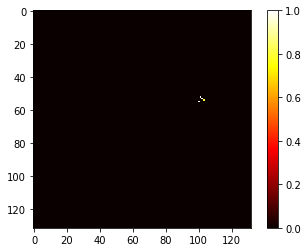

In [25]:
plt.imshow(m, cmap='hot')
plt.colorbar()
plt.show()